# Viral Tweets

Using K-Nearest Neighbor algorithm to predict whether a tweet will go viral.

Some of these features are dictionaries. For example, the feature `"user"` is a dictionary. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from functools import partial
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
all_tweets = pd.read_json('random_tweets.json', lines=True)
print(all_tweets.head())

print(len(all_tweets))
print(all_tweets.columns)
print(all_tweets.dtypes)
print(all_tweets.info())

print(all_tweets.loc[0])
print(all_tweets.loc[0]['user']['location'])
print(all_tweets.loc[0]['text'])

                 created_at                   id               id_str  \
0 2018-07-31 13:34:40+00:00  1024287229525598210  1024287229525598208   
1 2018-07-31 13:34:40+00:00  1024287229512953856  1024287229512953856   
2 2018-07-31 13:34:40+00:00  1024287229504569344  1024287229504569344   
3 2018-07-31 13:34:40+00:00  1024287229496029190  1024287229496029184   
4 2018-07-31 13:34:40+00:00  1024287229492031490  1024287229492031488   

                                                text  truncated  \
0  RT @KWWLStormTrack7: We are more than a month ...      False   
1  @hail_ee23 Thanks love its just the feeling of...      False   
2  RT @TransMediaWatch: Pink News has more on the...      False   
3  RT @realDonaldTrump: One of the reasons we nee...      False   
4  RT @First5App: This hearing of His Word doesn’...      False   

                                            entities  \
0  {'hashtags': [], 'symbols': [], 'user_mentions...   
1  {'hashtags': [], 'symbols': [], 'user_menti

# Defining Viral Tweets

So how do we define a viral tweet? A good place to start is to look at the number of retweets the tweet has. 

In [3]:
median_retweet_count = all_tweets['retweet_count'].median()
print(median_retweet_count)

all_tweets['is_viral'] = np.where(all_tweets['retweet_count'] > median_retweet_count, 1, 0)
print(all_tweets['is_viral'])
print(all_tweets['retweet_count'].isna().sum())
print(all_tweets['is_viral'].value_counts())

labels = all_tweets['is_viral']

13.0
0        0
1        0
2        0
3        1
4        0
        ..
11094    1
11095    1
11096    0
11097    0
11098    0
Name: is_viral, Length: 11099, dtype: int64
0
0    5562
1    5537
Name: is_viral, dtype: int64


# Making Features

In [4]:
all_tweets['tweet_length'] = all_tweets.apply(lambda tweet: len(tweet['text']), axis = 1)
print(all_tweets['tweet_length'].head())
print(all_tweets['tweet_length'].isna().sum())

all_tweets['followers_count'] = all_tweets.apply(lambda tweet: tweet['user']['followers_count'], axis = 1)
print(all_tweets['followers_count'].head())
print(all_tweets['followers_count'].isna().sum())

all_tweets['friends_count'] = all_tweets.apply(lambda tweet: tweet['user']['friends_count'], axis = 1)
print(all_tweets['friends_count'].head())
print(all_tweets['friends_count'].isna().sum())

all_tweets['favourites_count'] = all_tweets.apply(lambda tweet: tweet['user']['favourites_count'], axis = 1)
print(all_tweets['favourites_count'].head())
print(all_tweets['favourites_count'].isna().sum())

all_tweets['hashtag_count'] = all_tweets.apply(lambda tweet: tweet['text'].count('#'), axis = 1)
print(all_tweets['hashtag_count'].head())
print(all_tweets['hashtag_count'].isna().sum())

data = all_tweets[['favourites_count', 'friends_count', 'hashtag_count', 'tweet_length', 'followers_count']]
print(data.head())
print(data.dtypes)

0    140
1     77
2    140
3    140
4    140
Name: tweet_length, dtype: int64
0
0     215
1     199
2     196
3    3313
4     125
Name: followers_count, dtype: int64
0
0     335
1     203
2     558
3    2272
4     273
Name: friends_count, dtype: int64
0
0     3419
1     2136
2    62560
3    51818
4     1332
Name: favourites_count, dtype: int64
0
0    0
1    0
2    0
3    0
4    0
Name: hashtag_count, dtype: int64
0
   favourites_count  friends_count  hashtag_count  tweet_length  \
0              3419            335              0           140   
1              2136            203              0            77   
2             62560            558              0           140   
3             51818           2272              0           140   
4              1332            273              0           140   

   followers_count  
0              215  
1              199  
2              196  
3             3313  
4              125  
favourites_count    int64
friends_count       int64


# Correlation between features and target variable


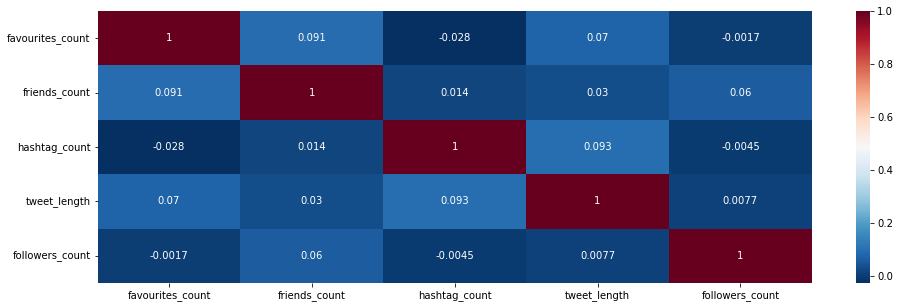

<Figure size 432x288 with 0 Axes>

In [5]:
data = pd.DataFrame(data)
corr_matrix = data.corr(method='pearson')
plt.figure(figsize = (16,5))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r')
plt.show()
plt.clf()

In [6]:
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.09:
            print(corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j])

friends_count favourites_count 0.0914604433520234
tweet_length hashtag_count 0.09314752725006271


In [7]:
#correlation between features and target
data_labels = data.copy()
data_labels['is_viral'] = labels
print(data_labels.head())
print(len(data_labels))
print(data_labels.isna().sum())

   favourites_count  friends_count  hashtag_count  tweet_length  \
0              3419            335              0           140   
1              2136            203              0            77   
2             62560            558              0           140   
3             51818           2272              0           140   
4              1332            273              0           140   

   followers_count  is_viral  
0              215         0  
1              199         0  
2              196         0  
3             3313         1  
4              125         0  
11099
favourites_count    0
friends_count       0
hashtag_count       0
tweet_length        0
followers_count     0
is_viral            0
dtype: int64


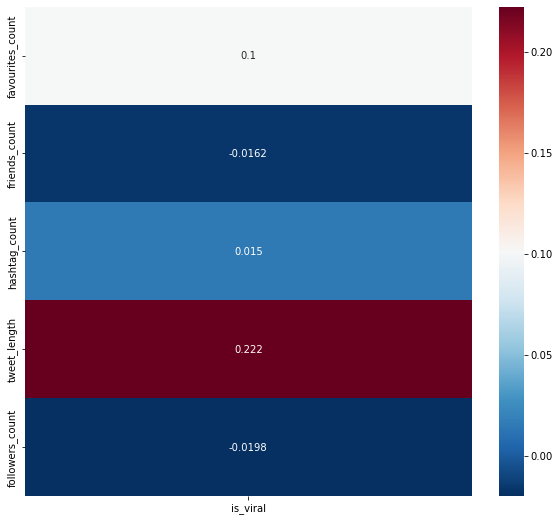

<Figure size 432x288 with 0 Axes>

In [8]:
data_labels_corr_matrix = data_labels.corr()
corr_target = data_labels_corr_matrix[['is_viral']].drop(labels=['is_viral'])
plt.figure(figsize = (10,9))
sns.heatmap(corr_target, annot=True, fmt='.3', cmap='RdBu_r')
plt.show()
plt.clf()

In [9]:
mutual_info_classif(data, labels, random_state=1)

array([0.03861087, 0.01730196, 0.        , 0.04351089, 0.01839652])

In [10]:
score_func = partial(mutual_info_classif, random_state=1)
selection = SelectKBest(score_func=score_func, k=4)
selection.fit_transform(data, labels)

array([[ 3419,   335,   140,   215],
       [ 2136,   203,    77,   199],
       [62560,   558,   140,   196],
       ...,
       [ 2262,    90,   140,   135],
       [ 2073,   320,   140,    59],
       [  543,  1697,    75,  1563]])

In [11]:
data = data[data.columns[selection.get_support(indices=True)]]
data

,favourites_count,friends_count,tweet_length,followers_count
0,3419,335,140,215
1,2136,203,77,199
2,62560,558,140,196
3,51818,2272,140,3313
4,1332,273,140,125
...,...,...,...,...
11094,17185,1323,140,509
11095,5007,1033,75,462
11096,2262,90,140,135
11097,2073,320,140,59


# Standardizing The Data

In [12]:
# scaler = StandardScaler()
# data_reshaped = np.array(data).reshape(-1, 1)
# data_scaled = scaler.fit_transform(data_reshaped)
# print(np.mean(data_scaled))
# print(np.std(data_scaled))
# print(data_scaled)

data_scaled = scale(data, axis=0)

print(data_scaled[0])

[-0.40862785 -0.14483305  0.6164054  -0.02878298]


# Creating the Training Set and Test Set

In [13]:
train_data, test_data, train_labels, test_labels = train_test_split(data_scaled, labels, test_size = 0.2, random_state = 42)

# Using the Classifier

In [14]:
classifier = KNeighborsClassifier(n_neighbors = 7)
classifier.fit(train_data, train_labels)
print(classifier.score(test_data, test_labels))

0.6108108108108108


# Choosing K

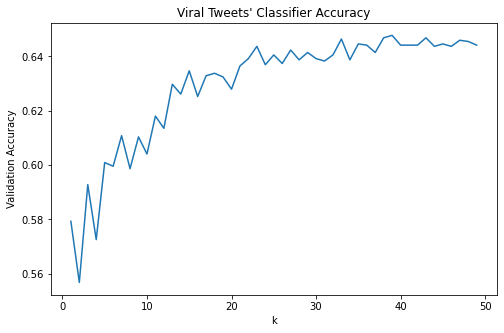

<Figure size 432x288 with 0 Axes>

In [17]:
scores = []
for k in range(1, 50):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(train_data, train_labels)
    scores.append(classifier.score(test_data, test_labels))
    
plt.figure(figsize = (8,5))
plt.plot(range(1,50), scores)
plt.xlabel('k')
plt.ylabel('Validation Accuracy')
plt.title('Viral Tweets\' Classifier Accuracy')
plt.show()
plt.clf()

In [18]:
classifier = KNeighborsClassifier(n_neighbors = 39)
classifier.fit(train_data, train_labels)
print(classifier.score(test_data, test_labels))

0.6477477477477478
